## Assignment 2

### Packeges and imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Import and greyscale image

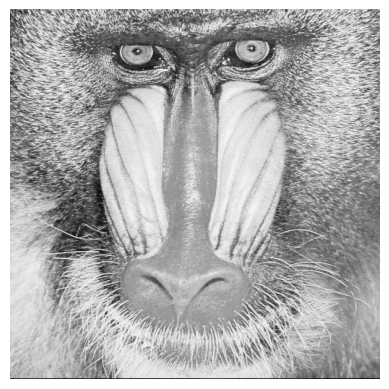

In [ ]:
img_path = 'mandrill.jpg'
mandril = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(mandril, cmap='Greys_r')
plt.gcf()
plt.axis('off')
plt.show()

## Gaussian filtering
for $\sigma = [1, 2,4, 8]$

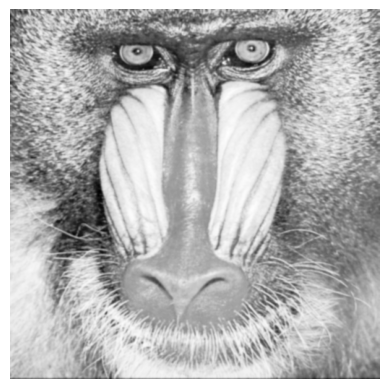

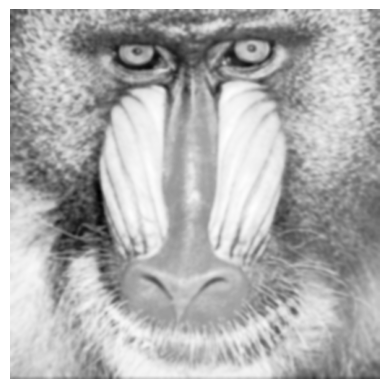

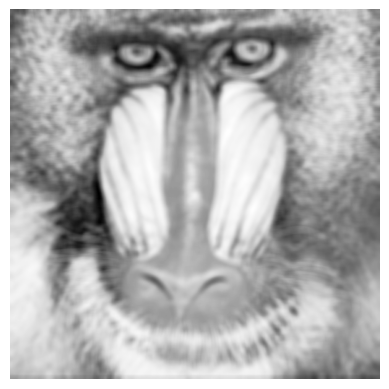

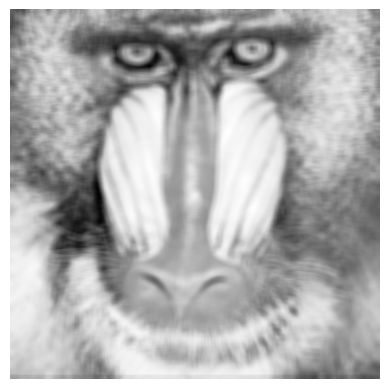

In [12]:
sigma = [1,2,4,8]
kernel_size = (11,11) # tested different kernel sizes
for s in sigma:
    blurred = cv2.GaussianBlur(mandril, kernel_size, s)
    plt.imshow(blurred, cmap='Greys_r')
    plt.gcf()
    plt.axis('off')
    plt.show()

### Explanation

we implimented this section using CV2's Gaussianblur function for different values of $\sigma$, and a  set kernel size. The size of the kernel, and value for sigma decide the amount of blur for the image. As the sigma parameter increases, an increasing amount of blur can be seen on the image. At $\sigma = 1$ hardly any blurring shows up on the image, and most features are retained. This effect increases all the way up to $\sigma =8$ were some of the finer features has dissappeared, and only bolder features remaing.

## Gradient magnitude computation using gaussian derivatives (edge detection)

In [ ]:
#mathematically strict version of gradient magnitude calculation
def gaussian_derivatives(sigma):

    # Create a grid of (x,y) coordinates (kernel)
    size = 11
    ax = np.linspace(-(size // 2), size // 2, size)
    x, y = np.meshgrid(ax, ax)
    
    #Gaussian
    G = (1/(2*np.pi*sigma**2)) * np.exp(-(x**2 + y**2)/(2*sigma**2))
    
    # Gaussian derivatives
    dx= -(x / (sigma**2)) * G
    dy= -(y / (sigma**2)) * G

    return dx, dy

def find_edges(image, sigma):
    # Get Gaussian derivatives
    dx, dy = gaussian_derivatives(sigma)
    
    # Convolve image with Gaussian derivatives
    grad_x = cv2.filter2D(image, -1, dx)
    grad_y = cv2.filter2D(image, -1, dy)
    
    # Gradient magnitude
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    return gradient_magnitude

In [ ]:
#mathematically strict definition of gradient magnitude



#Define function to compute gradient magnitude
def gradient_magnitude_function(image, sigma):
    gaussian = cv2.GaussianBlur(image, ksize=(11, 11), sigmaX=sigma, sigmaY=sigma)#define gaussian
    dx = cv2.Sobel(gaussian, cv2.CV_64F, 1, 0, ksize=3) #find partial derivative in x direction
    dy = cv2.Sobel(gaussian, cv2.CV_64F, 0, 1, ksize=3) #find partial derivative in y direction
    magnitude = np.sqrt(dx**2 + dy**2) #compute gradient magnitude
    return magnitude

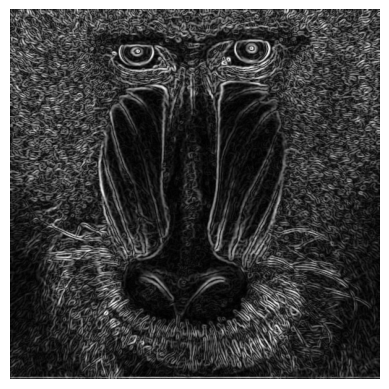

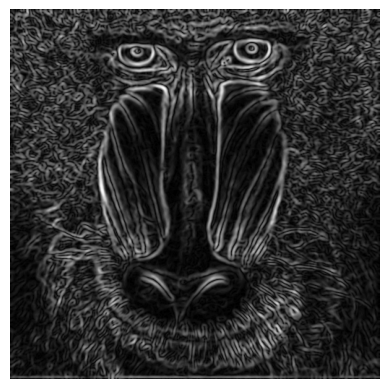

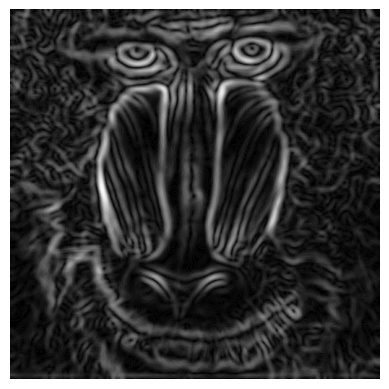

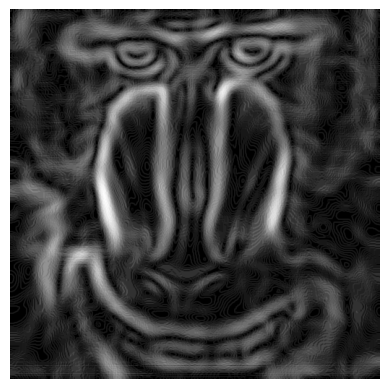

In [16]:
# Display images with different values of sigma
sigma = [1, 2, 4, 8]
for s in sigma:
    magnitude = gradient_magnitude_function(mandril, s)
    plt.imshow(magnitude, cmap='Greys_r')
    plt.gcf()
    plt.axis('off')
    plt.show()

## Laplacian-Gaussian filtering

## Canny edge detection